# Case study - Trajectory of a projectile

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import * 
init_printing(use_unicode=True)
import numpy as np 

## Objectives
* Study characteristics of the trajectory of a projectile in the ideal case of a motion in a uniform gravitational field
 ![](./trajectory_of_projectile.png)

## 1. Equation of the trajectory

In the ideal case of a motion in a uniform gravitational field, in the absence of other forces (such as air drag), the trajectory of a projectile is described by a parabola given by:

eq(1) :$$ z(x) = -\frac{1}{2}g\frac{x^2}{v^{2}_{0} \cos^2 \alpha} + x\tan \alpha + h $$  

where $g$ is the acceleration of gravity (9.81 $ms^{−2}$ ), $v_{0}$ is the initial velocity of the projectile, $\alpha$ is the angle of elevation and $h$ is the initial altitude from which the projectile is thrown.





* Q1.1 - Create a function that represents equation (1).

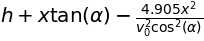

In [13]:
from sympy import * 
import numpy as np 
g, x, v0, alpha, h = symbols('g, x, v0, alpha , h', positive=True)

facts = Q.positive(x), Q.positive(v0), Q.positive(alpha), Q.positive(h)

def f(x, alpha, v0, h, g=9.81):      
        return(-g*x**2/(2*(v0**2)*(cos(alpha)*cos(alpha))))+ x*tan(alpha)+h 
f(x,alpha,v0,h,g=9.81)

In [14]:
# way 2: using sympy expression only  
z = (-g*x**2/(2*(v0**2)*(cos(alpha)*cos(alpha))))+ x*tan(alpha)+h


* Q 1.2 - Plot the trajectory for the following set of parameters
    * $h = 1.70m$
    * $\alpha = 40^{\circ}$
    * $ v_{0} = 8 ms^{−1}$

In [15]:
# using way 1 subsituting the values 
z= f(x,np.deg2rad(40), 8, 1.70)
z

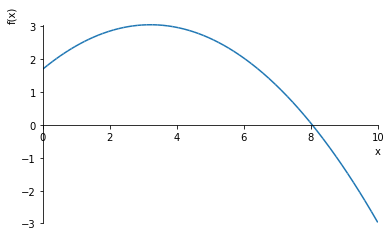

In [16]:
plot(z, (x, 0, 10))

* Q 1.3 - On the same graph, plot several trajectories of projectile launched at different elevation angles but with the same speed v0 = 8ms−1 and the same initial altitude h = 1.70m.

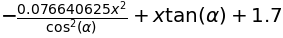

In [6]:
y= f(x, alpha, v0 = 8, h=1.7)
y

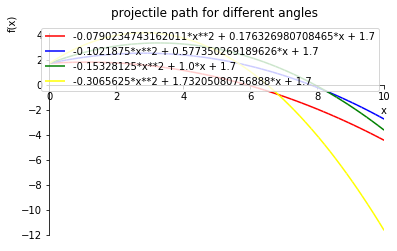

In [10]:
alpha = [10, 30, 45, 60]
alpha = np.deg2rad(alpha)
l1 = [f(x, alpha=i, v0=8, h=1.7) for i in alpha]
p3 = plot(*l1, (x, 0,  10), show=False, title = 'projectile path for different angles ', legend = ['i'], loc=3)
p3[0].line_color = 'red', 
p3[1].line_color = 'blue'
p3[2].line_color = 'green'
p3[3].line_color = 'yellow'

p3.show()

## 2. Trajectory analysis


* Q 2.1 - Determine a function $f_h(\alpha, v_0 , h)$ that returns the greatest parabolic height a object reaches within its trajectory.



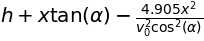

In [17]:
def z(x, alpha, v0, h, g=9.81):      
        return(-g*x**2/(2*(v0**2)*(cos(alpha)*cos(alpha))))+ x*tan(alpha)+h 
z(x,alpha,v0,h,g=9.81)


In [25]:
# in analysis math, the function is max when its first differentiation is equal to zero
d_z = diff(z(x, alpha, v0, h, g=9.81), x)
print (d_z)
f_h = solveset(d_z, x, domain=S.Reals)
f_h


tan(alpha) - 9.81*x/(v0**2*cos(alpha)**2)


* Q 2.2 - Determine a function $f_R(\alpha, v_0, h)$ that gives the range defined by the greatest distance an object travels
along the x axis.

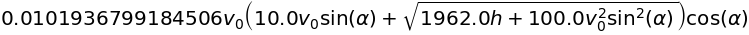

In [26]:
# highest distance is acheived when f crosses zero line 
s = solve(f(x, alpha, v0, h), x)
f_R =s[1] 
f_R

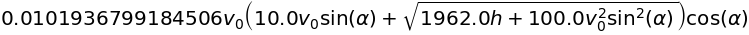

In [32]:
s = solve(z(x, alpha, v0, h, g=9.81), x, domain=S.Reals)
s
z_R=s[1]
z_R

* Q 2.3 - Illustrate with a graphic that an optimal value of $\alpha$ provides the highest range.



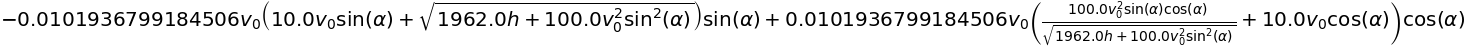

In [34]:
g_R = diff(z_R, alpha)
g_R

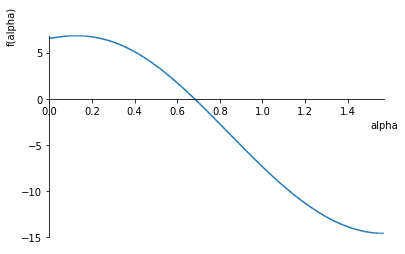

In [35]:
plot(g_R.subs({v0:8, h:1.7}), (alpha, 0, pi/2))

* Q 2.4 - Try to find a symbolic solution of $\alpha$ optimum . Give an numeric solution for the set of parameters defined in section 1.


In [37]:
alpha_optimum = solve(g_R.subs({v0:8, h:1.7}), alpha)
print('alpha in radian ', alpha_optimum[0])
print('alpha in degree' , np.rad2deg(float(alpha_optimum[0])))

alpha in radian  0.681290966881072
alpha in degree 39.0350970227



* Q 2.5 - In the specific case where $h$ = 0, give an algebraic solution of $\alpha$ optimum .

In [40]:
k = solve(g_R.subs({h:0}), alpha)
k

## 3. Starting from scratch


Consider a particle of mass $m$, the Newton second law states:
$$F = ma$$
where $F$ and $a$ represent respectively the sum of forces and the acceleration of the projectile. 
Since we only consider the ideal case with $F = m\overrightarrow{g} = −mg\overrightarrow{z}$. 
Therefore, if we only consider the trajectory of in the plane $O\overrightarrow{x}\overrightarrow{z}$


we can write the coordinate of the mobile $M$ according to $\overrightarrow{OM}= 
\begin{pmatrix} 
  x \\
  z 
\end{pmatrix}$

eq(2):
$$\begin{pmatrix} 
  0 \\
  -g 
\end{pmatrix} = \frac{d^2 \overrightarrow{OM}}{dt^2} = 
\begin{pmatrix} 
  \frac{d^2 x}{dt^2} \\
  \frac{d^2 z}{dt^2}
\end{pmatrix}$$

* Q 3.1 - By integrating equation (2) and using correct initial constant, compute the two equations $x(t)$ and $z(t)$.


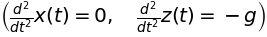

In [41]:
t = symbols('t')
x = Function('x')
z = Function('z')
eqx = Eq(x(t).diff(t, 2))
eqz = Eq(z(t).diff(t, 2), -g)

eqx, eqz

In [42]:
e = dsolve(eqz, z(t))
e

In [43]:
C1, C2 = symbols('C1, C2')
e.subs({C1:h, C2:v0})

In [44]:
x0 = symbols('x0')
s = dsolve(eqx, x(t))
s.subs({C1:x0, C2:v0})

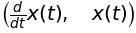

In [45]:
eqx1 = integrate(x(t).diff(t, 2), t)
eqx2 = integrate(eqx1, t)
eqx1, eqx2

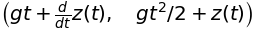

In [46]:
eqz1 = integrate(z(t).diff(t, 2)+g, t)
eqz2 = integrate(eqz1, t)
eqz1, eqz2